In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)

In [34]:
df = pd.read_csv('data.csv')

In [35]:
df

,n,d,time_gs,time_astar,time_dfs,time_bfs,gen_gs,gen_astar,gen_dfs,gen_bfs,exp_gs,exp_astar,exp_dfs,exp_bfs
0,4,11,0.1152,0.1126,0.1127,0.1125,11,11,11,11,11,11,11,11
1,4,12,0.1174,0.1188,0.1161,0.1166,12,12,12,12,12,12,12,12
2,6,27,0.1168,0.1323,0.1169,0.1194,27,27,27,27,27,27,27,27
3,6,30,0.1207,0.1213,0.1160,0.1172,33,33,33,33,32,32,33,33
4,8,49,0.1270,0.1315,0.1257,0.1355,112,132,110,132,110,132,107,132
5,8,53,0.1200,0.1251,0.1680,0.1799,69,87,473,588,61,81,469,588
6,10,78,0.1300,0.1369,0.1511,0.1635,112,117,334,353,105,111,328,353
7,10,81,0.1375,0.1391,1.7360,2.3610,103,135,13053,15543,91,125,13047,15543
8,12,114,0.8525,1.0380,1.1610,1.5240,4364,5718,7505,9069,4352,5707,7495,9069
9,12,116,3.4870,4.5470,4.9600,7.4130,21403,28066,38152,47097,21393,28057,38143,47097


In [36]:
df['input'] = df.apply(lambda x: f"N={int(x['n'])};d={int(x['d'])}", axis = 1)
df

,n,d,time_gs,time_astar,time_dfs,time_bfs,gen_gs,gen_astar,gen_dfs,gen_bfs,exp_gs,exp_astar,exp_dfs,exp_bfs,input
0,4,11,0.1152,0.1126,0.1127,0.1125,11,11,11,11,11,11,11,11,N=4;d=11
1,4,12,0.1174,0.1188,0.1161,0.1166,12,12,12,12,12,12,12,12,N=4;d=12
2,6,27,0.1168,0.1323,0.1169,0.1194,27,27,27,27,27,27,27,27,N=6;d=27
3,6,30,0.1207,0.1213,0.1160,0.1172,33,33,33,33,32,32,33,33,N=6;d=30
4,8,49,0.1270,0.1315,0.1257,0.1355,112,132,110,132,110,132,107,132,N=8;d=49
5,8,53,0.1200,0.1251,0.1680,0.1799,69,87,473,588,61,81,469,588,N=8;d=53
6,10,78,0.1300,0.1369,0.1511,0.1635,112,117,334,353,105,111,328,353,N=10;d=78
7,10,81,0.1375,0.1391,1.7360,2.3610,103,135,13053,15543,91,125,13047,15543,N=10;d=81
8,12,114,0.8525,1.0380,1.1610,1.5240,4364,5718,7505,9069,4352,5707,7495,9069,N=12;d=114
9,12,116,3.4870,4.5470,4.9600,7.4130,21403,28066,38152,47097,21393,28057,38143,47097,N=12;d=116


In [37]:
df = pd.wide_to_long(df, ['time', 'gen', 'exp'], i='input', j='search', sep='_', suffix='\\w+')
df = df.reset_index()
df

,input,search,d,n,time,gen,exp
0,N=4;d=11,gs,11,4,0.1152,11,11
1,N=4;d=12,gs,12,4,0.1174,12,12
2,N=6;d=27,gs,27,6,0.1168,27,27
3,N=6;d=30,gs,30,6,0.1207,33,32
4,N=8;d=49,gs,49,8,0.1270,112,110
5,N=8;d=53,gs,53,8,0.1200,69,61
6,N=10;d=78,gs,78,10,0.1300,112,105
7,N=10;d=81,gs,81,10,0.1375,103,91
8,N=12;d=114,gs,114,12,0.8525,4364,4352
9,N=12;d=116,gs,116,12,3.4870,21403,21393


In [38]:
df['search'] = df['search'].replace({'gs': 'GS', 'astar': 'A*', 'dfs': 'DFS', 'bfs': 'BFS'})

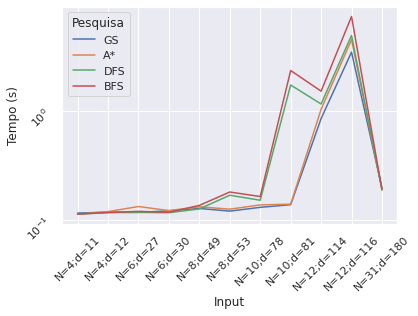

In [47]:
ax = sns.lineplot(data=df, x="input", y="time", hue="search")
ax.tick_params(rotation=45)
ax.set_xlabel('Input')
ax.set_ylabel('Tempo (s)')
ax.get_legend().set_title('Pesquisa')
ax.set_yscale('log')

plt.savefig('time.svg', bbox_inches='tight')

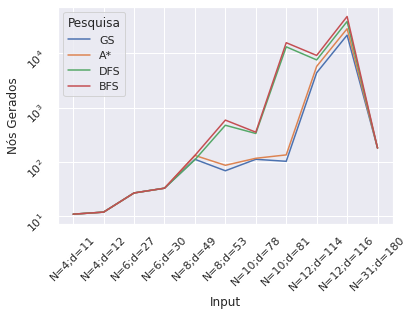

In [48]:
ax = sns.lineplot(data=df, x="input", y="gen", hue="search")
ax.tick_params(rotation=45)
ax.set_xlabel('Input')
ax.set_ylabel('Nós Gerados')
ax.get_legend().set_title('Pesquisa')
ax.set_yscale('log')

plt.savefig('generated.svg', bbox_inches='tight')

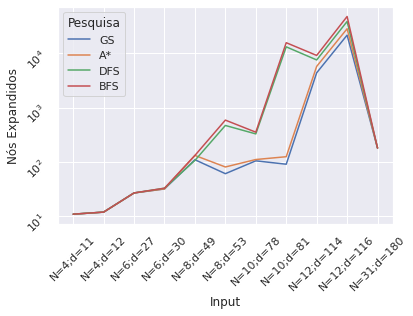

In [49]:
ax = sns.lineplot(data=df, x="input", y="exp", hue="search")
ax.tick_params(rotation=45)
ax.set_xlabel('Input')
ax.set_ylabel('Nós Expandidos')
ax.get_legend().set_title('Pesquisa')
ax.set_yscale('log')

plt.savefig('expanded.svg', bbox_inches='tight')